Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')
(506, 13)
(506,)


/home/mier/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


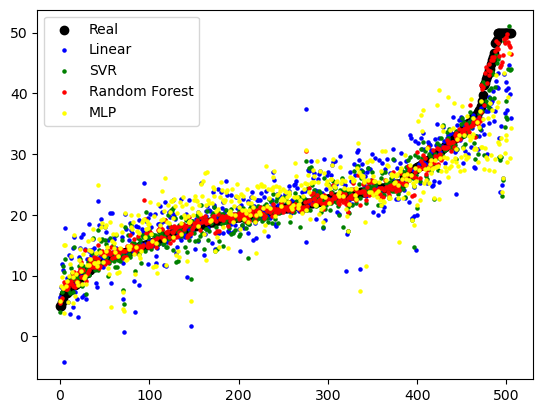

In [7]:
# Ejercicio 6 (multivariate)
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import numpy as np
import pandas as pd

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X_full = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
Y = raw_df.values[1::2, 2]
print(raw_df.columns)
k = 5

print(X_full.shape)
print(Y.shape)
X = X_full[:, :]
orden = np.argsort(Y)
horizontal = np.arange(Y.shape[0])
plt.scatter(horizontal, Y[orden], color='black')

regressor = LinearRegression()
regressor.fit(X, Y)
plt.scatter(horizontal, regressor.predict(X)[orden], k, color='blue')

regressor = SVR(kernel='rbf', C=1e5, epsilon=1)
regressor.fit(X, Y)
plt.scatter(horizontal, regressor.predict(X)[orden], k, color='green')

regressor = RandomForestRegressor()
regressor.fit(X, Y)
plt.scatter(horizontal, regressor.predict(X)[orden], k, color='red')

regressor = MLPRegressor()
regressor.fit(X, Y)
plt.scatter(horizontal, regressor.predict(X)[orden], k, color='yellow')

plt.legend(['Real', 'Linear', 'SVR', 'Random Forest', 'MLP'])
plt.show()


In [8]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X_full = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
Y = raw_df.values[1::2, 2]
print(raw_df.columns)

print(X_full.shape)
print(Y.shape)
# Se elige la variable mas dependiente de la salida
selector = SelectKBest(f_regression, k=13)
selector.fit(X_full, Y)
X = X_full[:, :]

regressor = LinearRegression()
regressor.fit(X, Y)
# Error cuadratico medio de cada fold, seguido de media de folds
score = cross_val_score(regressor, X, Y, scoring='neg_mean_squared_error', cv=10).mean()
# La prediccion es la respuesta del modelo aprendido en el
# el fold para el que la instancia fue parte del conjunto de test
predicted = cross_val_predict(regressor, X, Y, cv=10)
mse = mean_squared_error(Y, predicted)
# Resultados parecidos pero no iguales
print("LIN MSE =", mse)
print("LIN score =", -score)

regressor = SVR(kernel='rbf', C=1e1, epsilon=1)
regressor.fit(X, Y)
score = cross_val_score(regressor, X, Y, scoring='neg_mean_squared_error', cv=10).mean()
predicted = cross_val_predict(regressor, X, Y, cv=10)
mse = mean_squared_error(Y, predicted)
print("SVR MSE =", mse)
print("SVR score =", -score)

regressor = RandomForestRegressor()
regressor.fit(X, Y)
score = cross_val_score(regressor, X, Y, scoring='neg_mean_squared_error', cv=10).mean()
predicted = cross_val_predict(regressor, X, Y, cv=10)
mse = mean_squared_error(Y, predicted)
print("RNF MSE =", mse)
print("RNF score =", -score)


Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')
(506, 13)
(506,)
LIN MSE = 34.5396595399932
LIN score = 34.705255944524865
SVR MSE = 65.9780875187515
SVR score = 65.8593187241985
RNF MSE = 22.21267215019762
RNF score = 21.912318663215682
